In [1]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

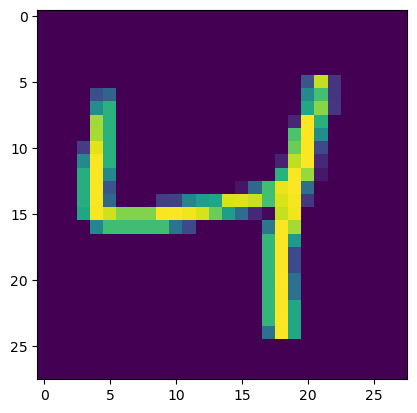

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#Bring these arrays to value between 0-1 so divide it by max value i.e 255
X_train=X_train/255
X_test=X_test/255

In [7]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Prepare Model

In [8]:
 #Flatten layer is used to convert higher dimensional array into 1D
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
history= model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2748 - accuracy: 0.9198 - val_loss: 0.1672 - val_accuracy: 0.9519
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1143 - accuracy: 0.9649 - val_loss: 0.1027 - val_accuracy: 0.9693
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.1086 - val_accuracy: 0.9665
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0986 - val_accuracy: 0.9709
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0966 - val_accuracy: 0.9723
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.1050 - val_accuracy: 0.9686
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.1033 - val_accuracy:

In [12]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 808us/step


In [13]:
y_pred=y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9759

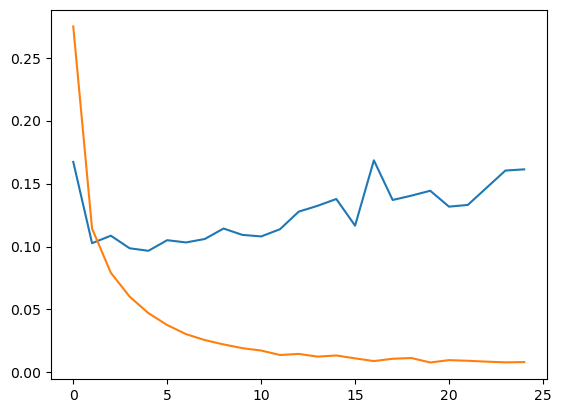

In [15]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

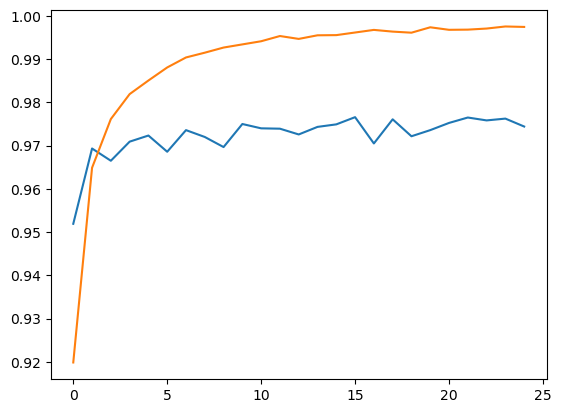

In [16]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

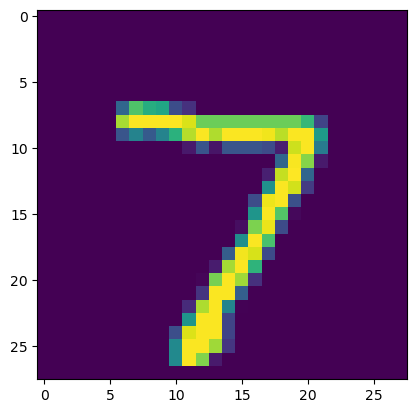

In [17]:
plt.imshow(X_test[0])

In [19]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 18ms/step


array([7], dtype=int64)